In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train[0].shape

(28, 28)

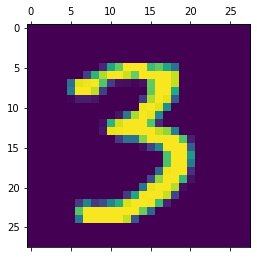

In [14]:
plt.matshow(x_train[10000])

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
#ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer= 'adam',loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

In [27]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0101 - accuracy: 0.9971
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9782


[0.10726751387119293, 0.9782000184059143]

In [39]:
#CNN
model = keras.Sequential([
    layers.Conv2D(300,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 300)       3000      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 300)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 50700)             0         
                                                                 
 dense_8 (Dense)             (None, 100)               5070100   
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 5,074,110
Trainable params: 5,074,110
Non-trainable params: 0
____________________________________________

In [41]:
model.compile(optimizer= 'sgd',loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

In [42]:
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 224s 119ms/step - loss: 0.4762 - accuracy: 0.8732
Epoch 2/3
1875/1875 [==============================] - 224s 119ms/step - loss: 0.2267 - accuracy: 0.9327
Epoch 3/3
1875/1875 [==============================] - 224s 120ms/step - loss: 0.1734 - accuracy: 0.9475


In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 10s 31ms/step - loss: 0.1445 - accuracy: 0.9563


[0.14453722536563873, 0.9563000202178955]